# Probabilistic Fingerprinting Approach

## Import Libraries

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

## Import Data

In [3]:
df_concatenated = pd.read_csv("C:/Users/fabio/Documents/GitHub/CompactProbes/data/train_test/bin_train_new.csv")

In [4]:
df_concatenated

,label,concatenated
0,HuaweiHonor9_R,0001101000100001000000000001011111111111000000...
1,HuaweiHonor9_R,0001101000100001000000000001011111111111000000...
2,HuaweiHonor9_R,0001101000100001000000000001011111111111000000...
3,HuaweiHonor9_R,0001101000100001000000000001011111111111000000...
4,HuaweiHonor9_R,0001101000100001000000000001011111111111000000...
...,...,...
728,iPhoneXSMax_M,0001101000101101000000000001101111111111000000...
729,iPhoneXSMax_M,0001101000101101000000000001101111111111000000...
730,iPhoneXSMax_M,0001101000101101010000000001101111111111000000...
731,iPhoneXSMax_M,0001101000101101010000000001101111111111000000...


In [5]:
df_concatenated["concatenated_array"] = df_concatenated["concatenated"].apply(
    lambda x: np.array(list(x))
)

In [6]:
df_concatenated.drop(columns=["concatenated"], inplace=True)

In [7]:
df_concatenated

,label,concatenated_array
0,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...
728,iPhoneXSMax_M,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ..."
729,iPhoneXSMax_M,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ..."
730,iPhoneXSMax_M,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ..."
731,iPhoneXSMax_M,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, ..."


In [8]:
len(df_concatenated["concatenated_array"][0])

1784

Converting the `concatenated_array` column into a numpy matrix

In [9]:
# Extract the 'concatenated_array' column as a list of lists
concatenated_array_list = df_concatenated["concatenated_array"].tolist()

# Convert the list to a NumPy matrix with dtype=object to allow mixed types (e.g., int and str)
numpy_matrix = np.array(concatenated_array_list, dtype=object)

In [10]:
def get_matrix(df):
    return np.array(df["concatenated_array"].tolist(), dtype=object)

In [11]:
numpy_matrix

array([['0', '0', '0', ..., '1', '0', '1'],
       ['0', '0', '0', ..., '1', '0', '0'],
       ['0', '0', '0', ..., '0', '1', '1'],
       ...,
       ['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '0', '1'],
       ['0', '0', '0', ..., '0', '1', '1']],
      shape=(733, 1784), dtype=object)

## Variability Vector

Calculate the entropy of each bit considering 3 possible outcomes:
- 1
- 0
- Not present

Consequently following the formula: $H(X_i) = - \sum P(X_{ix})\log_3P(X_{ix})$. The log is base 3 since we have a tristate and not a bit.

In [12]:
numpy_matrix[:, 0]

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

Calculate the discrete probability density function of the symbols in the matrix.

In [13]:
from collections import Counter


def calculate_pdf(array):
    # Convert array to a numpy array for easier manipulation
    array = np.array(array, dtype=object)

    # Get the number of rows and columns
    num_rows, num_cols = array.shape

    # Initialize a list to store the PDFs for each column
    pdfs = []

    # Iterate over each column
    for col in range(num_cols):
        # Get the current column
        column_data = array[:, col]

        # Count occurrences of each bit value ('0', '1', 'U')
        counts = Counter(column_data)

        # Calculate probabilities for '0', '1', and 'U'
        prob_0 = counts.get("0", 0) / num_rows
        prob_1 = counts.get("1", 0) / num_rows
        prob_U = counts.get("U", 0) / num_rows

        # Append the PDF for this column
        pdfs.append({"0": prob_0, "1": prob_1, "U": prob_U})

    return pdfs

In [14]:
pdf = calculate_pdf(numpy_matrix)

In [15]:
len(pdf)

1784

Let's now generate the variability vector for each bit: $v = [H_1, ..., H_n]$ where $n$ is the number of bits in the frame and $H_n$ is the entropy of bit $n$.

In [16]:
import math

In [17]:
def shannon_entropy(array):
    # First, calculate the PDF for each column
    pdfs = calculate_pdf(array)

    # Initialize a list to store the entropy values for each column
    entropies = []

    # Iterate over each column's PDF
    for pdf in pdfs:
        # Extract probabilities for '0', '1', and 'U'
        probabilities = [pdf["0"], pdf["1"], pdf["U"]]

        # Calculate Shannon entropy for the current column
        entropy = 0
        for prob in probabilities:
            if prob > 0:  # Avoid log(0)
                entropy -= prob * math.log(prob, 3)

        # Append the entropy value for this column
        entropies.append(entropy)

    return entropies

**Variability vector**: entropy for each bit

In [18]:
v = shannon_entropy(numpy_matrix)

BAMBOO selected intervals and filter size

In [19]:
data = [
    (16, 336),
    (16, 16),
    (8, 24),
    (16, 16),
    (8, 336),
    (8, 8),
    (8, 328),
    (16, 352),
    (16, 336),
    (16, 240),
    (8, 216),
    (16, 0),
    (8, 8),
    (8, 248),
    (16, 368),
    # (16, 1696),
    (16, 0),
    (8, 424),
    (8, 40),
    (16, 464),
    (8, 440),
    (8, 560),
    (8, 584),
    (16, 560),
    (16, 560),
    (16, 608),
    (16, 544),
    (8, 560),
    (8, 552),
    (16, 112),
    (8, 408),
    (8, 440),
]

In [20]:
# FABIO
data_fabio = [
    (8, 8),
    (8, 328),
    (8, 408),
    (8, 360),
    (16, 352),
    (16, 352),
    (16, 400),
    (16, 16),
    (8, 328),
    (16, 16),
    (8, 24),
    (16, 432),
    (8, 248),
    (8, 216),
    (8, 216),
    (16, 208),
    (16, 208),
    (8, 336),
    (8, 40),
    (16, 240),
    (8, 376),
    (8, 440),
    (16, 400),
    (16, 432),
    (16, 256),
    (16, 32),
    (16, 320),
    (8, 368),
    (8, 368),
    (8, 384),
    (8, 496),
    (8, 528),
    (8, 552),
    (8, 400),
    (8, 416),
    (8, 448),
    (8, 504),
    (8, 416),
    (8, 496),
    (8, 528),
    (16, 544),
    (16, 576),
    (16, 448),
    (16, 416),
    (16, 448),
    (16, 464),
    (8, 360),
    (8, 440),
    (8, 560),
    (8, 560),
    (8, 584),
    (16, 112),
    (16, 560),
    (16, 560),
    (16, 608),
    (16, 544),
    (8, 328),
    (8, 344),
    (8, 344),
    (8, 432),
    (8, 432),
    (8, 496),
    (8, 520),
    (8, 488)
]
print(len(data_fabio))

64


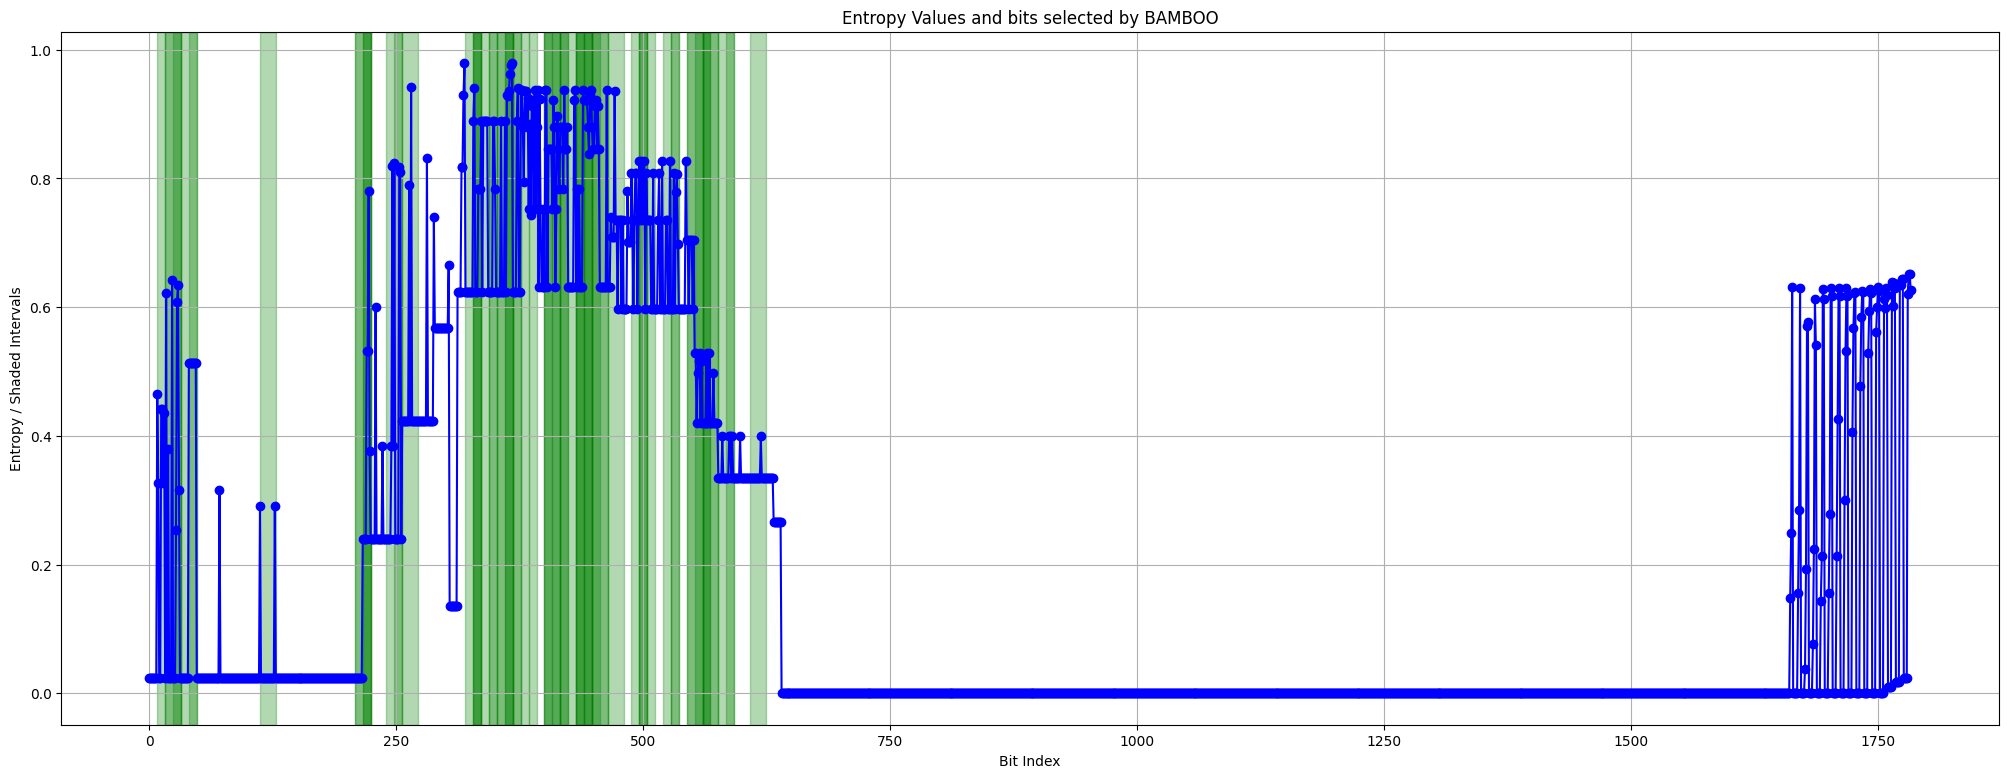

In [21]:
# Plot the entropy values
plt.figure(figsize=(25, 9))
plt.plot(v, marker="o", linestyle="-", color="b", label="Entropy")

# Shade the background for the intervals P to P + L
for l, p in data_fabio:
    plt.axvspan(
        p, p + l, color="green", alpha=0.3
    )  # Shade the area between P and P + L

# Adding labels and grid
plt.title("Entropy Values and bits selected by BAMBOO")
plt.xlabel("Bit Index")
plt.ylabel("Entropy / Shaded Intervals")
plt.grid(True)

# Show the plot
plt.show()

## (Per-device) Stability Vector

We define the stability of a bit as one minus the entropy of that bit measured over multiple MAC frames transmitted by the _same device_. How likely the bit will remain the same over multiple transmissions of the same device.

In [22]:
# Group the dataframe by the 'label' column
grouped = df_concatenated.groupby("label")

# Create a dictionary to store each DataFrame
label_dfs = {label: group for label, group in grouped}

# Display the keys (labels) to verify
label_dfs.keys()

dict_keys(['HuaweiHonor9_R', 'HuaweiL21_D', 'HuaweiP10_Q', 'OnePlusNord_O', 'SamsungS7_I', 'XiaomiA2_E', 'XiaomiRedmiNote7_S', 'XiaomiRedmiNote9S_T', 'iPhone11_B', 'iPhone11_C', 'iPhone11_M', 'iPhone12_M', 'iPhone12_W', 'iPhone6_N', 'iPhone7_F', 'iPhone7_X', 'iPhoneXR_L', 'iPhoneXSMax_M'])

In [23]:
label_dfs["HuaweiHonor9_R"]

,label,concatenated_array
0,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...
58,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
59,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
60,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."
61,HuaweiHonor9_R,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [24]:
# Dictionary to hold s arrays for each label
s_arrays = {}

# Iterate through the dictionary
for label, df in label_dfs.items():
    matrix = get_matrix(df)  # Get the matrix from the DataFrame
    entropy = shannon_entropy(matrix)  # Calculate the Shannon entropy
    sa = [1 - e for e in entropy]  # Compute the s array
    s_arrays[label] = sa  # Store the s array in the dictionary

Since the stability vector is per-device, we need to **average** it out in order to proceed in a more generalized way.

In [25]:
s = np.mean(list(s_arrays.values()), axis=0)

In [26]:
s

array([0.98914999, 0.98914999, 0.98914999, ..., 0.46893058, 0.48687533,
       0.47362877], shape=(1784,))

### Probabilistic Approach

Let's calculate the **suitability vector**

In [27]:
u = v * s

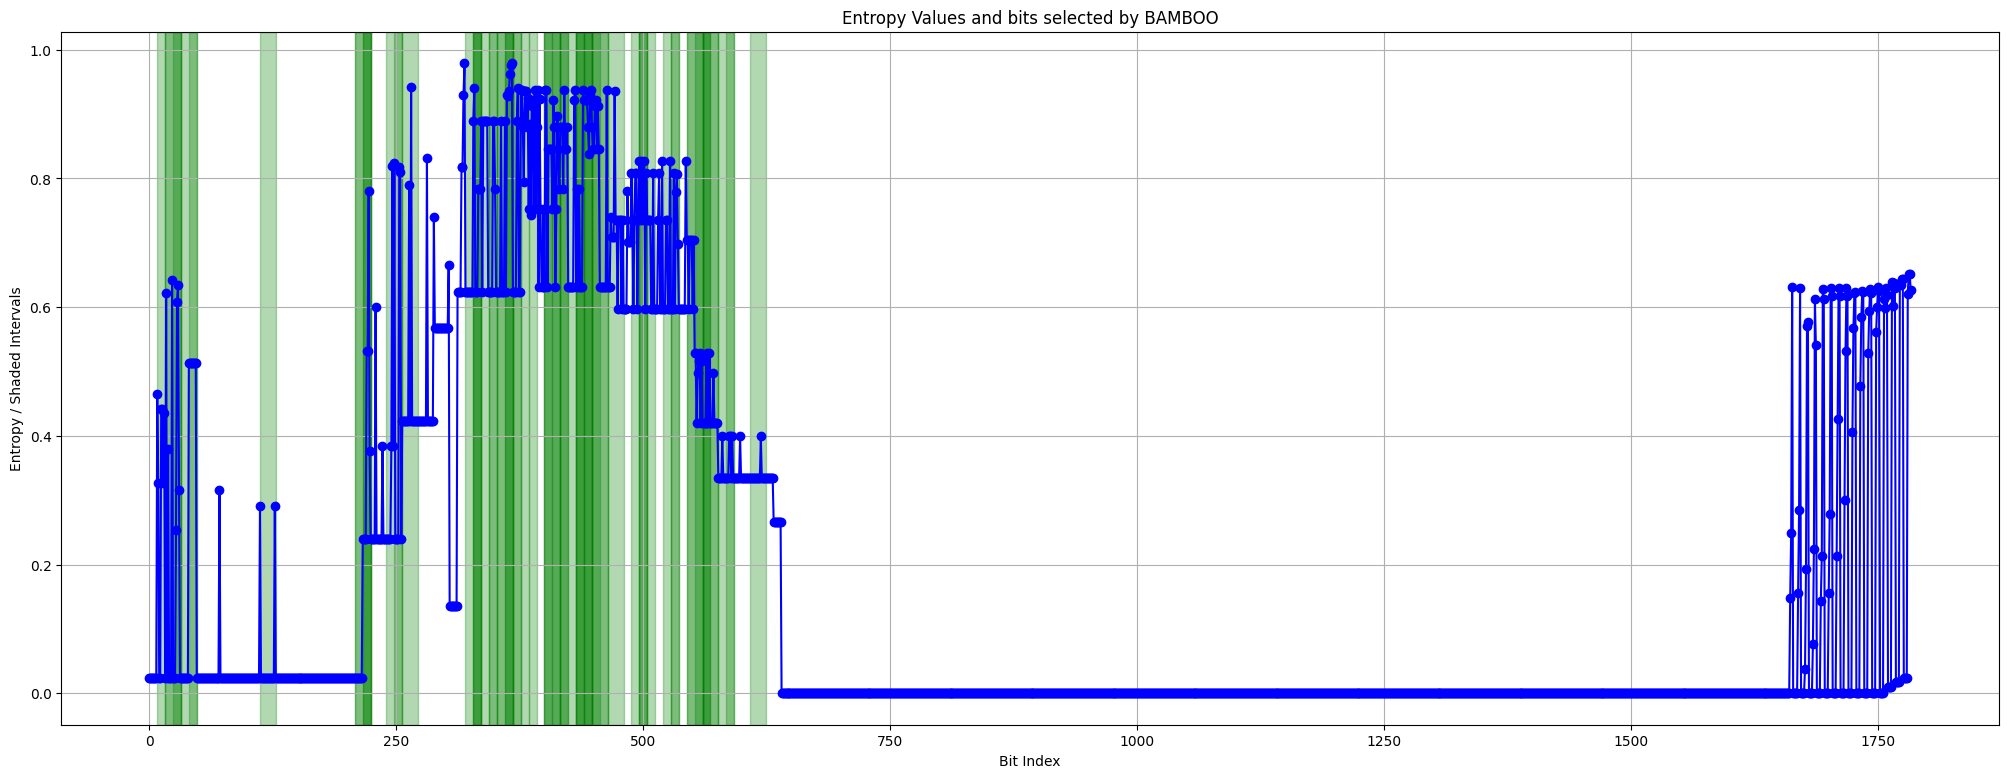

In [28]:
# Plot the entropy values
plt.figure(figsize=(25, 9))
plt.plot(v, marker="o", linestyle="-", color="b", label="Variability Vector")
plt.plot(
    # u,
    marker="x",
    linestyle="--",
    color="r",
    label="Suitability Vector",
    alpha=0.8,
)

# Shade the background for the intervals P to P + L
for l, p in data_fabio:
    plt.axvspan(
        p, p + l, color="green", alpha=0.3
    )  # Shade the area between P and P + L

# Adding labels and grid
plt.title("Entropy Values and bits selected by BAMBOO")
plt.xlabel("Bit Index")
plt.ylabel("Entropy / Shaded Intervals")
plt.grid(True)

# Show the plot
plt.show()

The average behavior is very similar. Possible explanation: many devices present very stable behavior (many stable bits) in the sense that many bits are set to `U`, meaning that, due to privacy reasons, they are omitted.

In [29]:
s_arrays["HuaweiHonor9_R"]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

### Individual Device Stability Analysis

In [30]:
def plot_entropy_vs_v(s_arrays, v, label_name="HuaweiHonor9_R"):
    # Assuming 'GooglePixel3A_L' contains entropy values and 'v' is the corresponding x-axis vector.
    entropy_values = s_arrays[label_name]

    #sort v and entropy_values by v
    entropy_values = [x for _, x in sorted(zip(v, entropy_values))]
    v = sorted(v)
    
    # Create a new figure
    plt.figure(figsize=(12, 6))

    # Plot the entropy values against vector 'v'
    plt.plot(
        v[: len(entropy_values)],
        entropy_values,
        marker="o",
        linestyle="-",
        color="b",
        label=label_name,
    )

    # Add labels, title, and grid
    plt.title(f"Entropy Values vs. Vector V for {label_name}")
    plt.xlabel("Vector V Index")
    plt.ylabel("Entropy Values")
    plt.grid(True)
    plt.legend()

    # Show the plot
    plt.show()

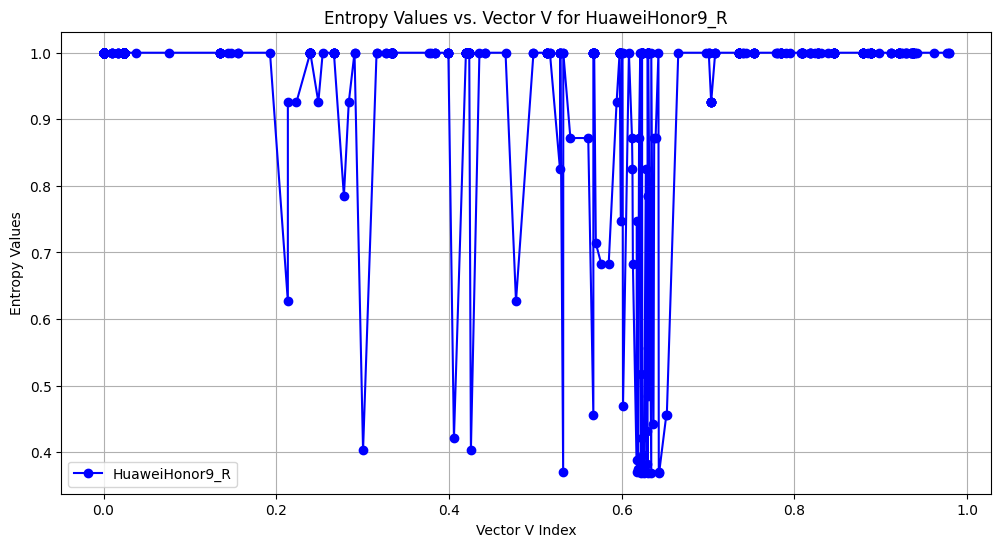

In [31]:
# non te lo consiglio
plot_entropy_vs_v(s_arrays, v)

### Filtering Approach

In [32]:
threshold = 0.8

In [33]:
u_filtering = [v[i] if s[i] >= threshold else 0 for i in range(len(v))]


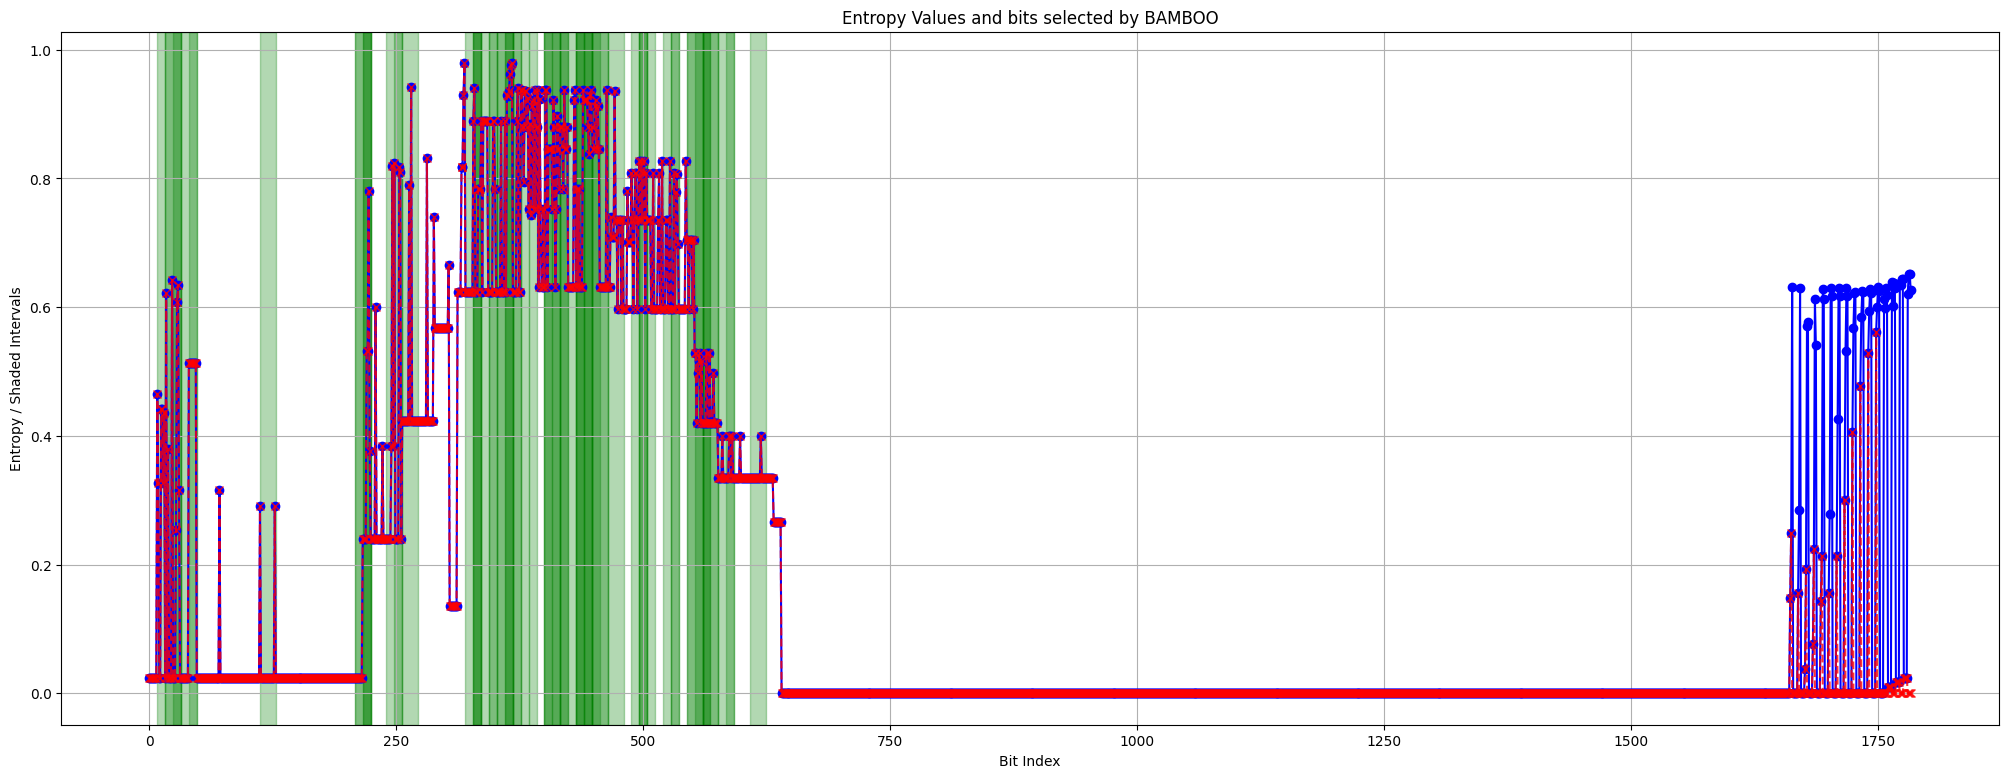

In [34]:
# Plot the entropy values
plt.figure(figsize=(25, 9))
plt.plot(v, marker="o", linestyle="-", color="b", label="Variability Vector")
plt.plot(
    u_filtering,
    marker="x",
    linestyle="--",
    color="r",
    label="Suitability Vector",
    alpha=0.8,
)

# Shade the background for the intervals P to P + L
for l, p in data_fabio:
    plt.axvspan(
        p, p + l, color="green", alpha=0.3
    )  # Shade the area between P and P + L

# Adding labels and grid
plt.title("Entropy Values and bits selected by BAMBOO")
plt.xlabel("Bit Index")
plt.ylabel("Entropy / Shaded Intervals")
plt.grid(True)

# Show the plot
plt.show()

In [35]:
s

array([0.98914999, 0.98914999, 0.98914999, ..., 0.46893058, 0.48687533,
       0.47362877], shape=(1784,))

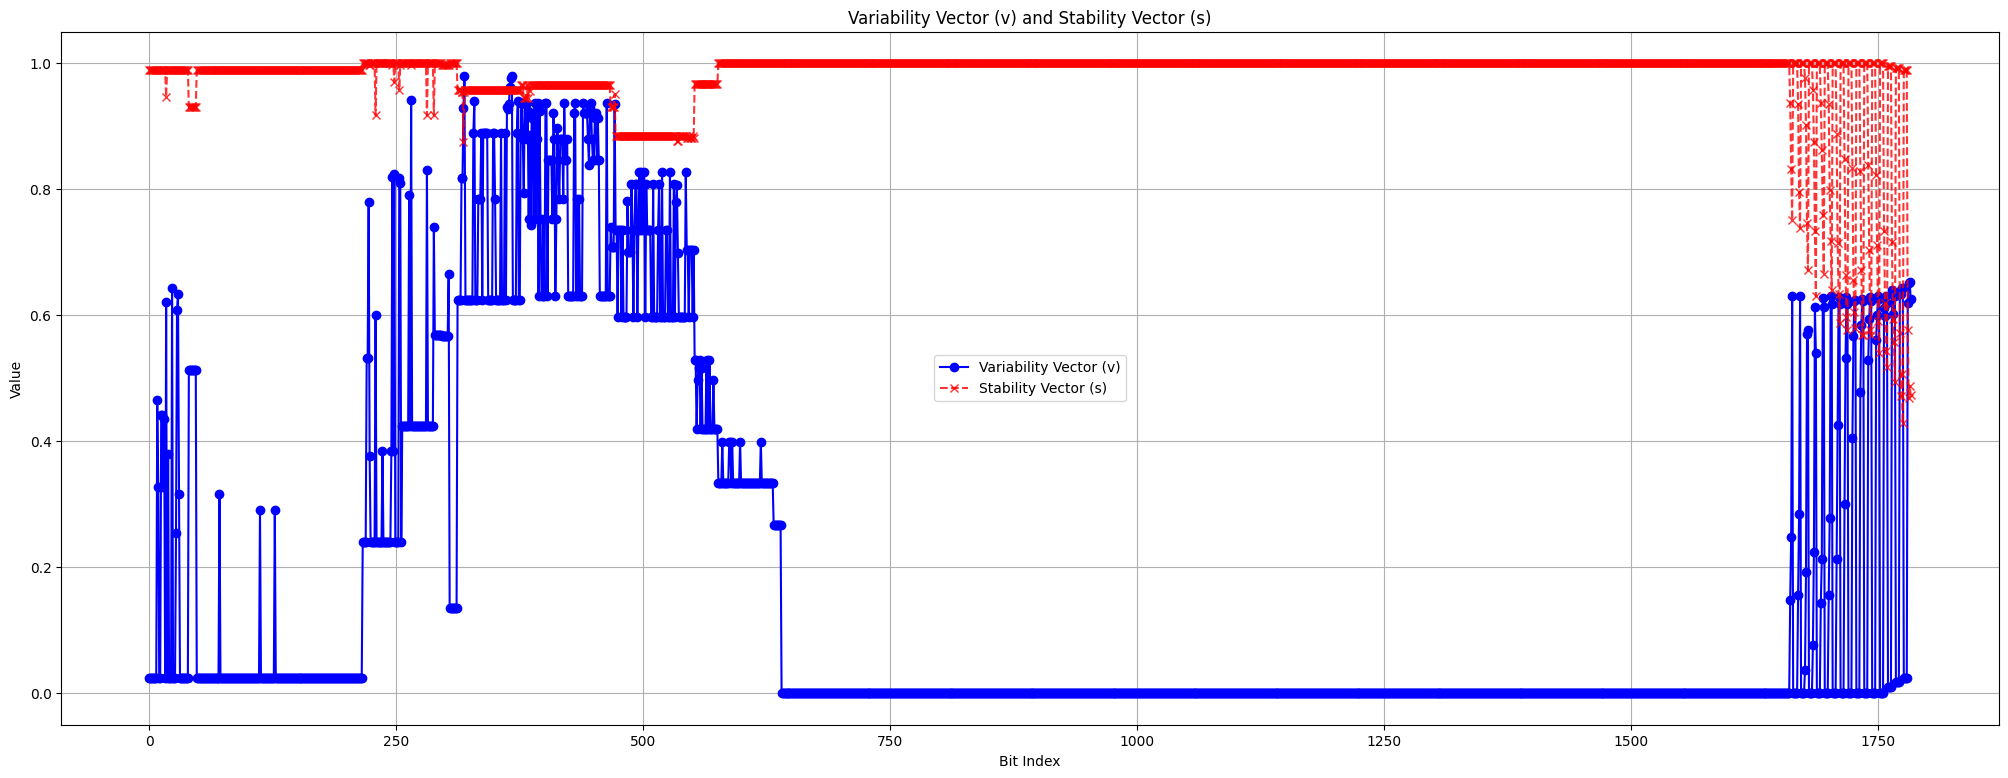

In [36]:
# Plot the variability vector (v) and stability vector (s)
plt.figure(figsize=(25, 9))
plt.plot(v, marker="o", linestyle="-", color="b", label="Variability Vector (v)")
plt.plot(
    s,
    marker="x",
    linestyle="--",
    color="r",
    label="Stability Vector (s)",
    alpha=0.8,
)

# Adding labels and grid
plt.title("Variability Vector (v) and Stability Vector (s)")
plt.xlabel("Bit Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

As one can see from the chart above, all the considered bits are very much stable. The reason can be the one described previously: some devices never use them and for that reason they are stable.

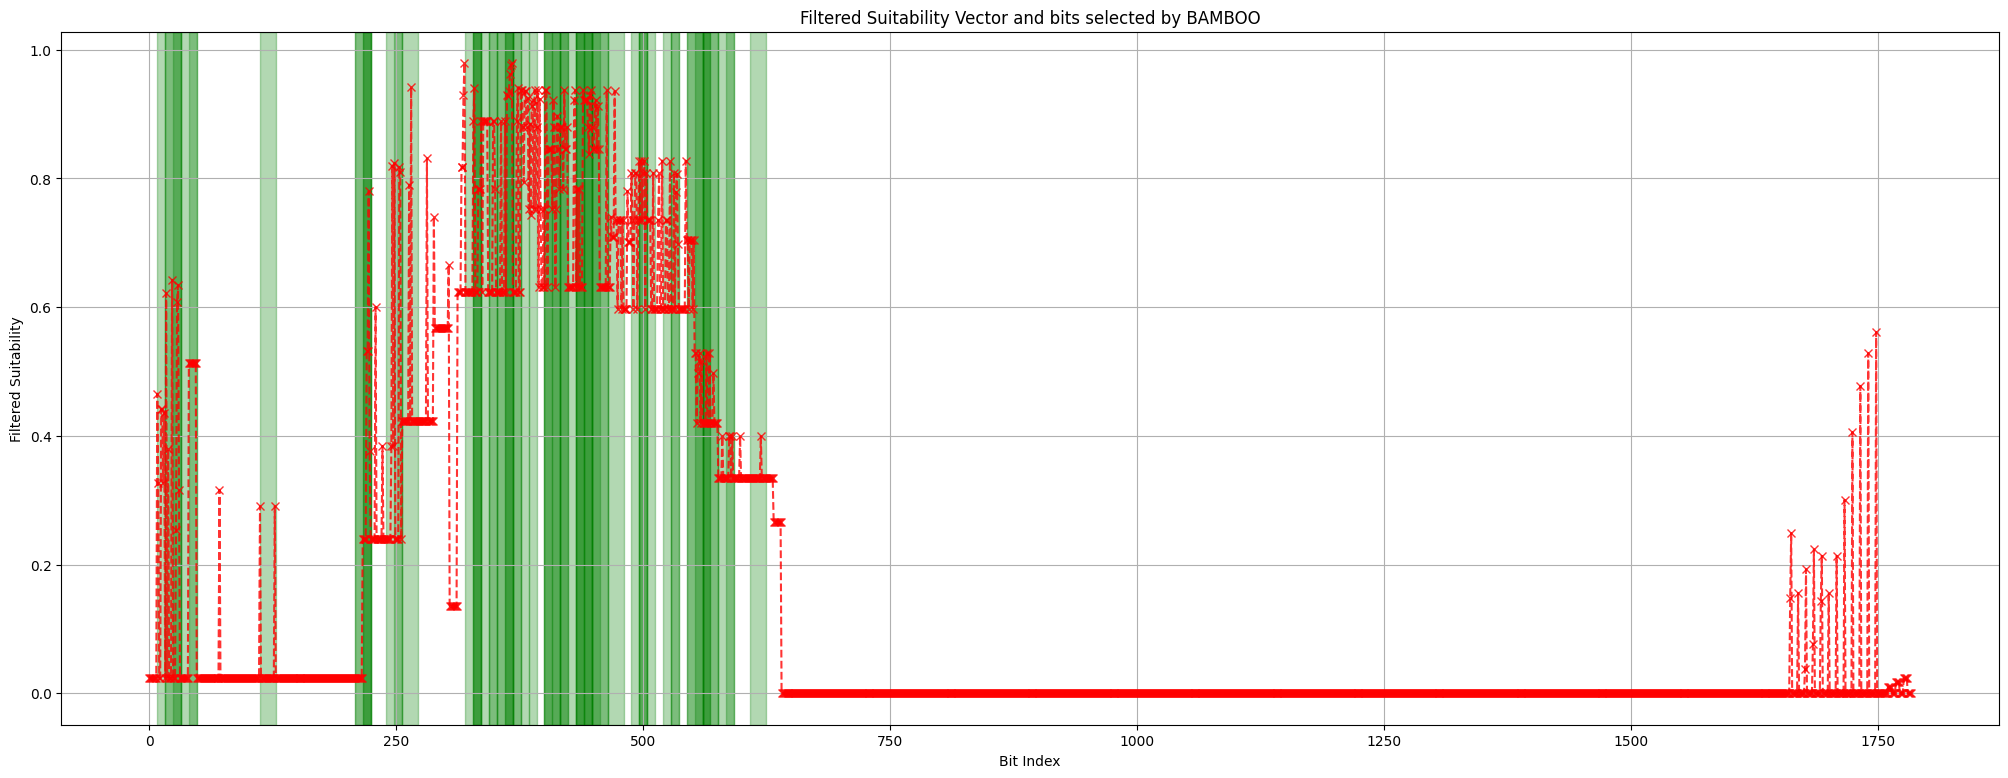

In [37]:
plt.figure(figsize=(25, 9))
plt.plot(
    u_filtering,
    marker="x",
    linestyle="--",
    color="r",
    label="Filtered Suitability Vector",
    alpha=0.8,
)

# Shade the background for the intervals P to P + L
for l, p in data_fabio:
    plt.axvspan(
        p, p + l, color="green", alpha=0.3
    )  # Shade the area between P and P + L

# Adding labels and grid
plt.title("Filtered Suitability Vector and bits selected by BAMBOO")
plt.xlabel("Bit Index")
plt.ylabel("Filtered Suitability")
plt.grid(True)

# Show the plot
plt.show()

## Fingerprint Extraction

In [78]:
#definisco la soglia che va a impattare sul numero di bit selezionati
fingerprint_threshold = 0.845

In [79]:
indexes = [i for i, value in enumerate(u_filtering) if value >= fingerprint_threshold]
# indexes

In [80]:
# Sort the indexes by the corresponding values in u_filtering in descending order
sorted_indexes = sorted(indexes, key=lambda i: u_filtering[i], reverse=True)
sorted_indexes

[319,
 367,
 366,
 365,
 265,
 329,
 373,
 376,
 377,
 390,
 393,
 401,
 402,
 420,
 431,
 439,
 447,
 463,
 364,
 380,
 381,
 471,
 362,
 446,
 318,
 363,
 383,
 395,
 388,
 409,
 430,
 440,
 441,
 442,
 443,
 452,
 387,
 451,
 454,
 413,
 328,
 336,
 338,
 339,
 340,
 341,
 342,
 348,
 349,
 356,
 360,
 372,
 385,
 378,
 382,
 392,
 410,
 416,
 417,
 418,
 423,
 444,
 448,
 404,
 405,
 406,
 407,
 414,
 421,
 422,
 449,
 450,
 453,
 455]

In [81]:
M = len(indexes)

In [82]:
M

74

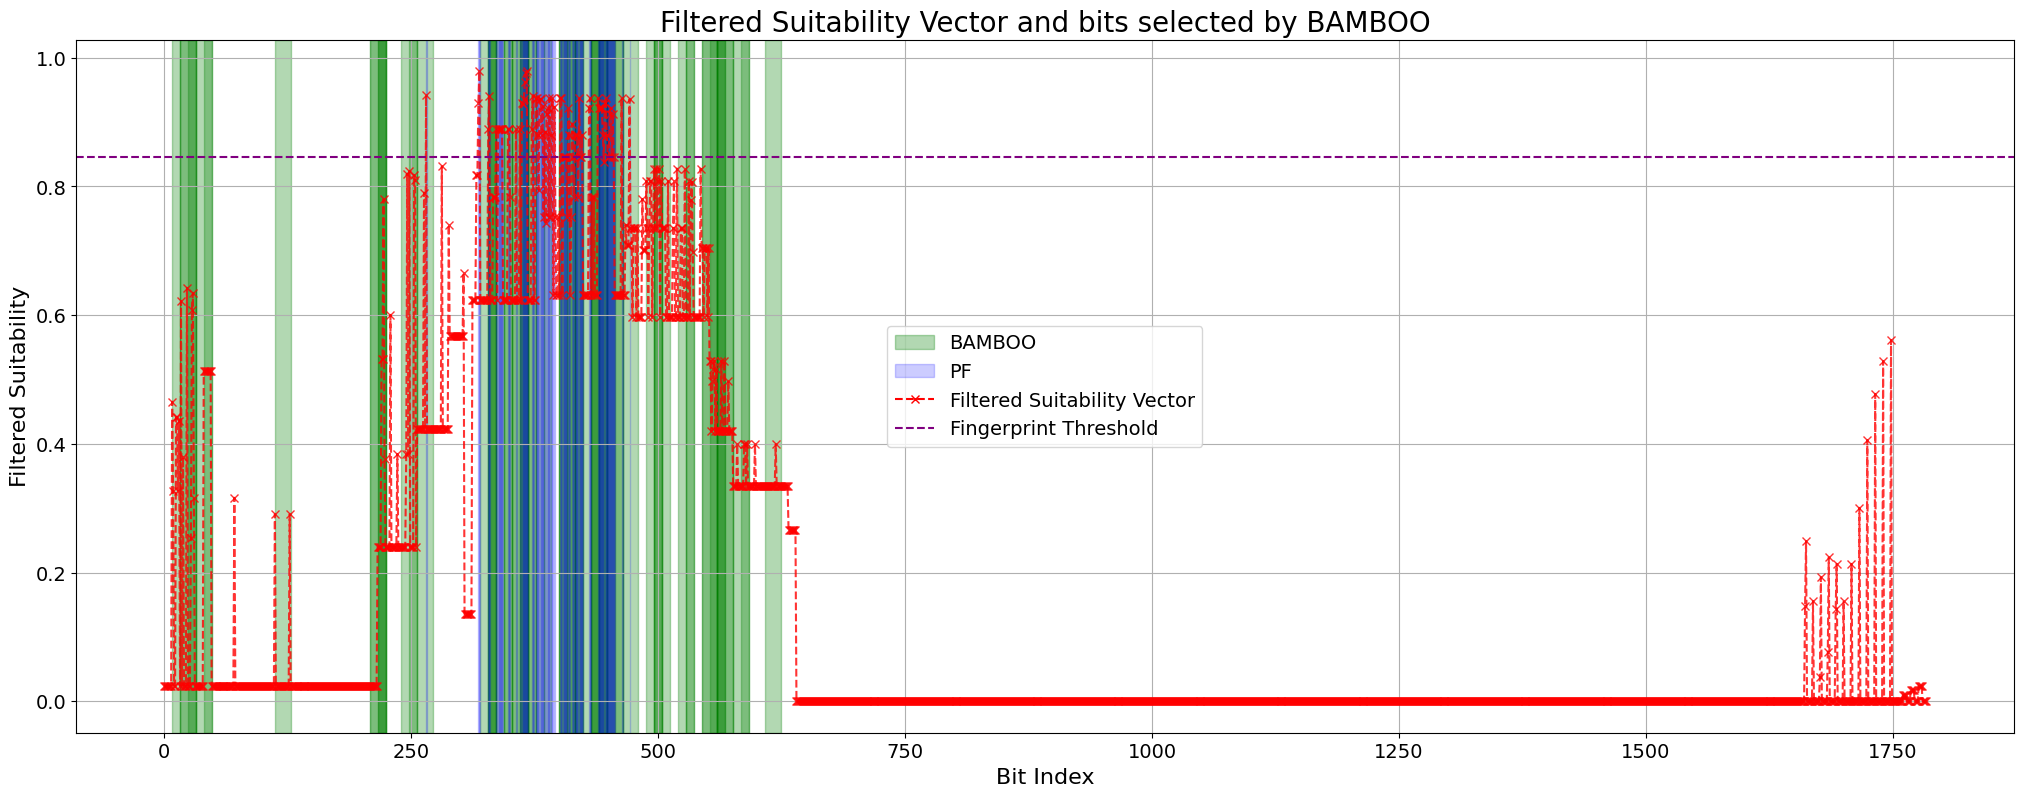

In [83]:
from matplotlib.patches import Patch

plt.figure(figsize=(25, 9))
plt.plot(
    u_filtering,
    marker="x",
    linestyle="--",
    color="r",
    label="Filtered Suitability Vector",
    alpha=0.8,
)
plt.axhline(
    y=fingerprint_threshold,
    color="purple",
    linestyle="--",
    label="Fingerprint Threshold",
)

# Shade the background for the intervals P to P + L
for l, p in data_fabio:
    plt.axvspan(
        p, p + l, color="green", alpha=0.3
    )  # Shade the area between P and P + L

# Shade the background for the intervals in indexes
for index in indexes:
    plt.axvspan(
        index, index + 1, color="blue", alpha=0.2
    )  # Shade the area for each index

# Adding labels and grid
plt.title("Filtered Suitability Vector and bits selected by BAMBOO", fontsize=20)
plt.xlabel("Bit Index", fontsize=16)
plt.ylabel("Filtered Suitability", fontsize=16)
plt.grid(True)

# Increase font size of axes indexes
plt.tick_params(axis="both", which="major", labelsize=14)

# Add legend
bamboo_patch = Patch(color="green", alpha=0.3, label="BAMBOO")
pf_patch = Patch(color="blue", alpha=0.2, label="PF")
plt.legend(
    handles=[
        bamboo_patch,
        pf_patch,
        plt.Line2D(
            [],
            [],
            color="r",
            marker="x",
            linestyle="--",
            label="Filtered Suitability Vector",
        ),
        plt.Line2D(
            [], [], color="purple", linestyle="--", label="Fingerprint Threshold"
        ),
    ],
    fontsize=14,
)

# Show the plot
plt.show()

In [84]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

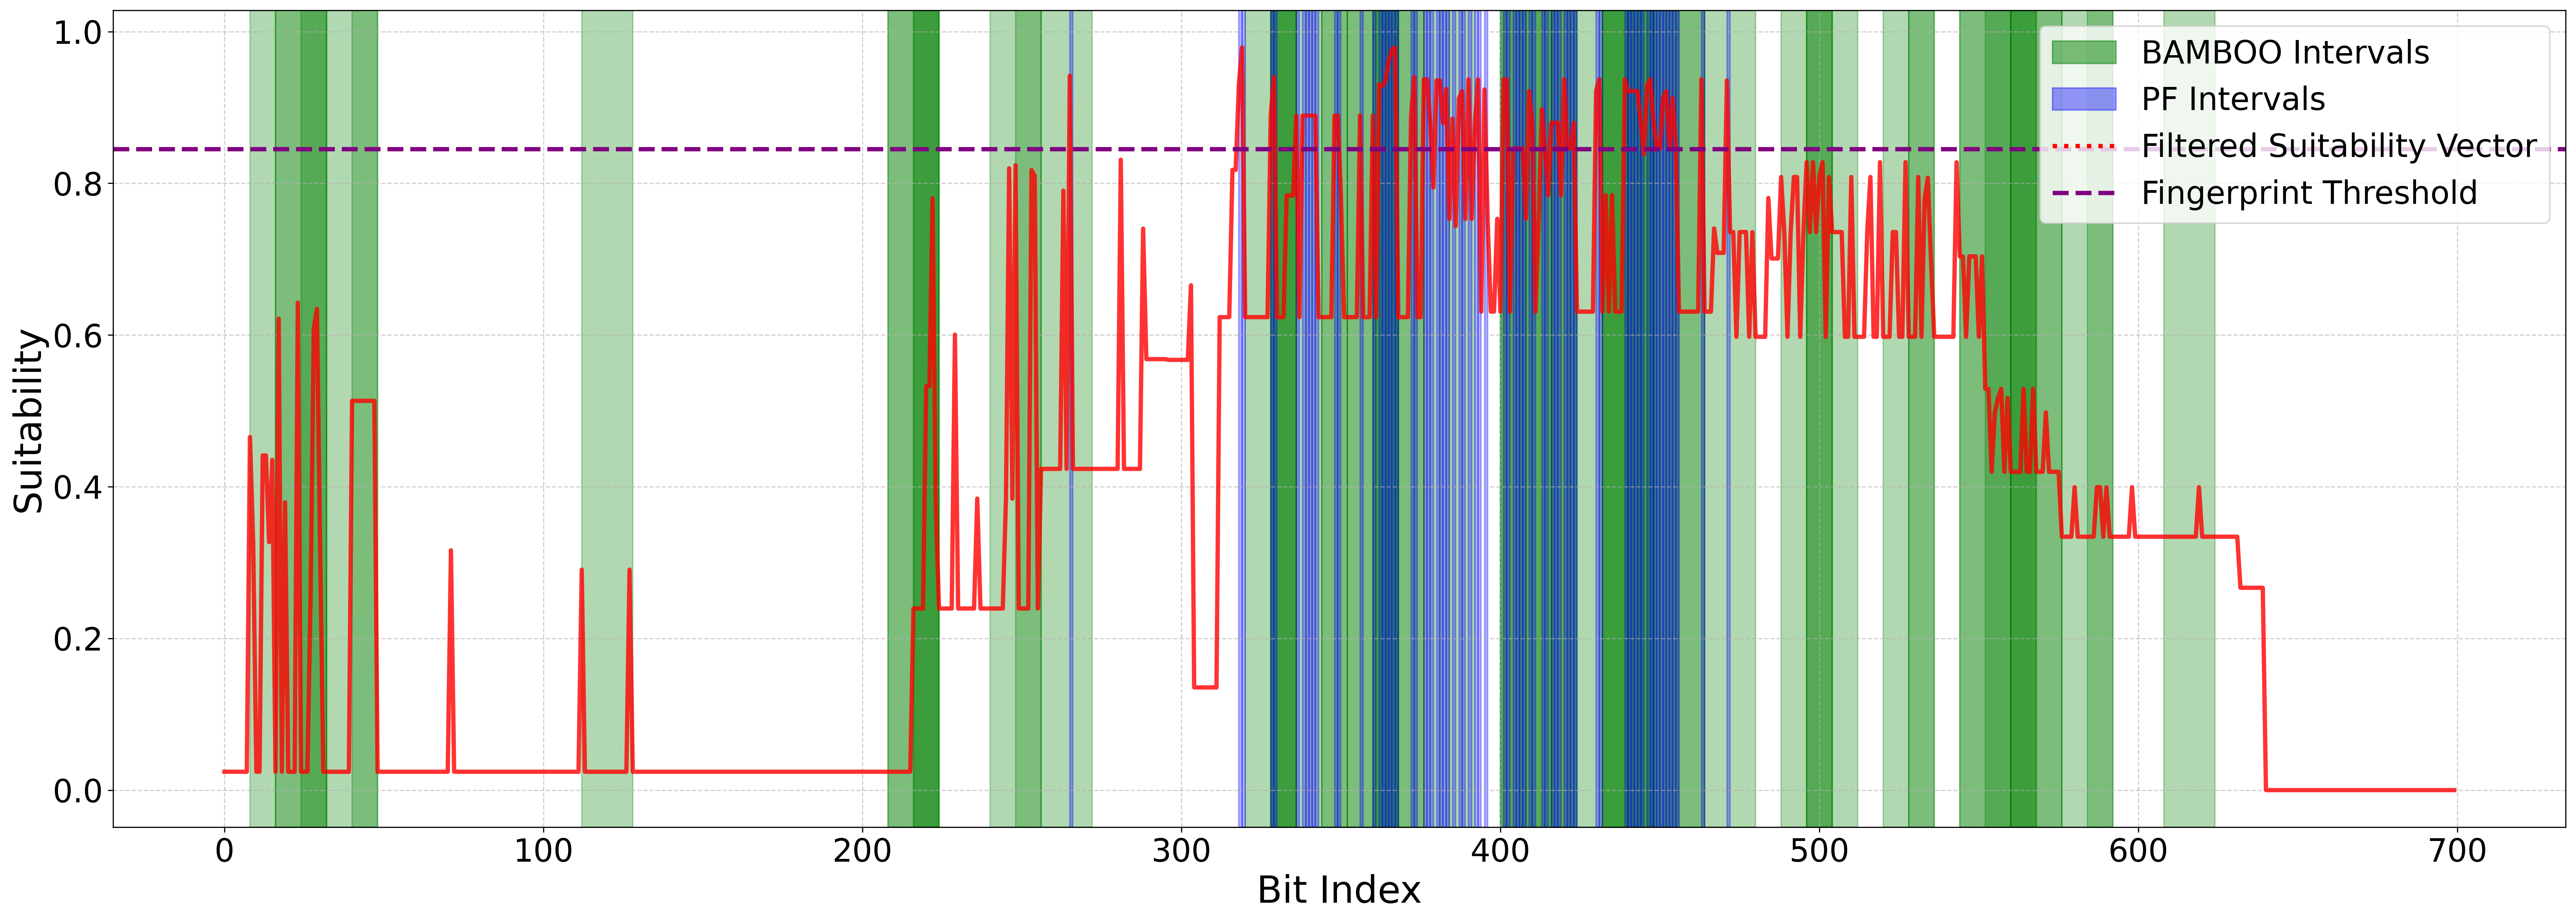

In [85]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

colors = sns.color_palette("tab10")

# Set figure size and high DPI for print quality
plt.figure(figsize=(25, 9), dpi=300)

# Plot the main line with large markers and thick lines for visibility
plt.plot(
    u_filtering[:700],
    marker="",
    markersize=6,  # Larger marker size
    linestyle="-",
    linewidth=3,  # Thicker line
    color="red",
    label="Filtered Suitability Vector",
    alpha=0.8,
)

# Add the fingerprint threshold line with a thicker line
plt.axhline(
    y=fingerprint_threshold,
    color="purple",
    linestyle="--",
    linewidth=3,
    label="Fingerprint Threshold",
)

# Shade background for intervals P to P + L with more distinct colors and opacity
for l, p in data_fabio:
    plt.axvspan(
        p,
        p + l,
        color="green",
        alpha=0.3,  # Less transparency for visibility
    )

# Shade background for each index in indexes
for index in indexes:
    plt.axvspan(index, index + 1, color="blue", alpha=0.3)

# Increase font sizes for title, labels, and grid
# plt.title("Filtered Suitability Vector and Bits Selected by BAMBOO", fontsize=30)
plt.xlabel("Bit Index", fontsize=26)
plt.ylabel("Suitability", fontsize=26)
plt.grid(True, linestyle="--", alpha=0.6)

# Increase font size for axis ticks
plt.tick_params(axis="both", which="major", labelsize=22)

# Define legend with even larger font sizes and clearer labels
bamboo_patch = Patch(color="green", alpha=0.5, label="BAMBOO Intervals")
pf_patch = Patch(color="blue", alpha=0.4, label="PF Intervals")
filtered_line = Line2D(
    [],
    [],
    color="red",
    marker="",
    linestyle="dotted",
    markersize=12,
    linewidth=3,
    label="Filtered Suitability Vector",
)
threshold_line = Line2D(
    [], [], color="purple", linestyle="--", linewidth=3, label="Fingerprint Threshold"
)

# Add legend with large font size and position it
plt.legend(
    handles=[bamboo_patch, pf_patch, filtered_line, threshold_line],
    fontsize=22,
    loc="upper right",
)

# Adjust layout for better fitting
plt.tight_layout()

#plt.savefig(
#    "C:/Users/fabio/Documents/GitHub/CompactProbes/outputs/figures/filtered_suitability_vector_plot.pdf",
#    dpi=300,
#    bbox_inches="tight",
#)

# Show the plot
plt.show()


In [86]:
y_threshold = fingerprint_threshold - 0.03775

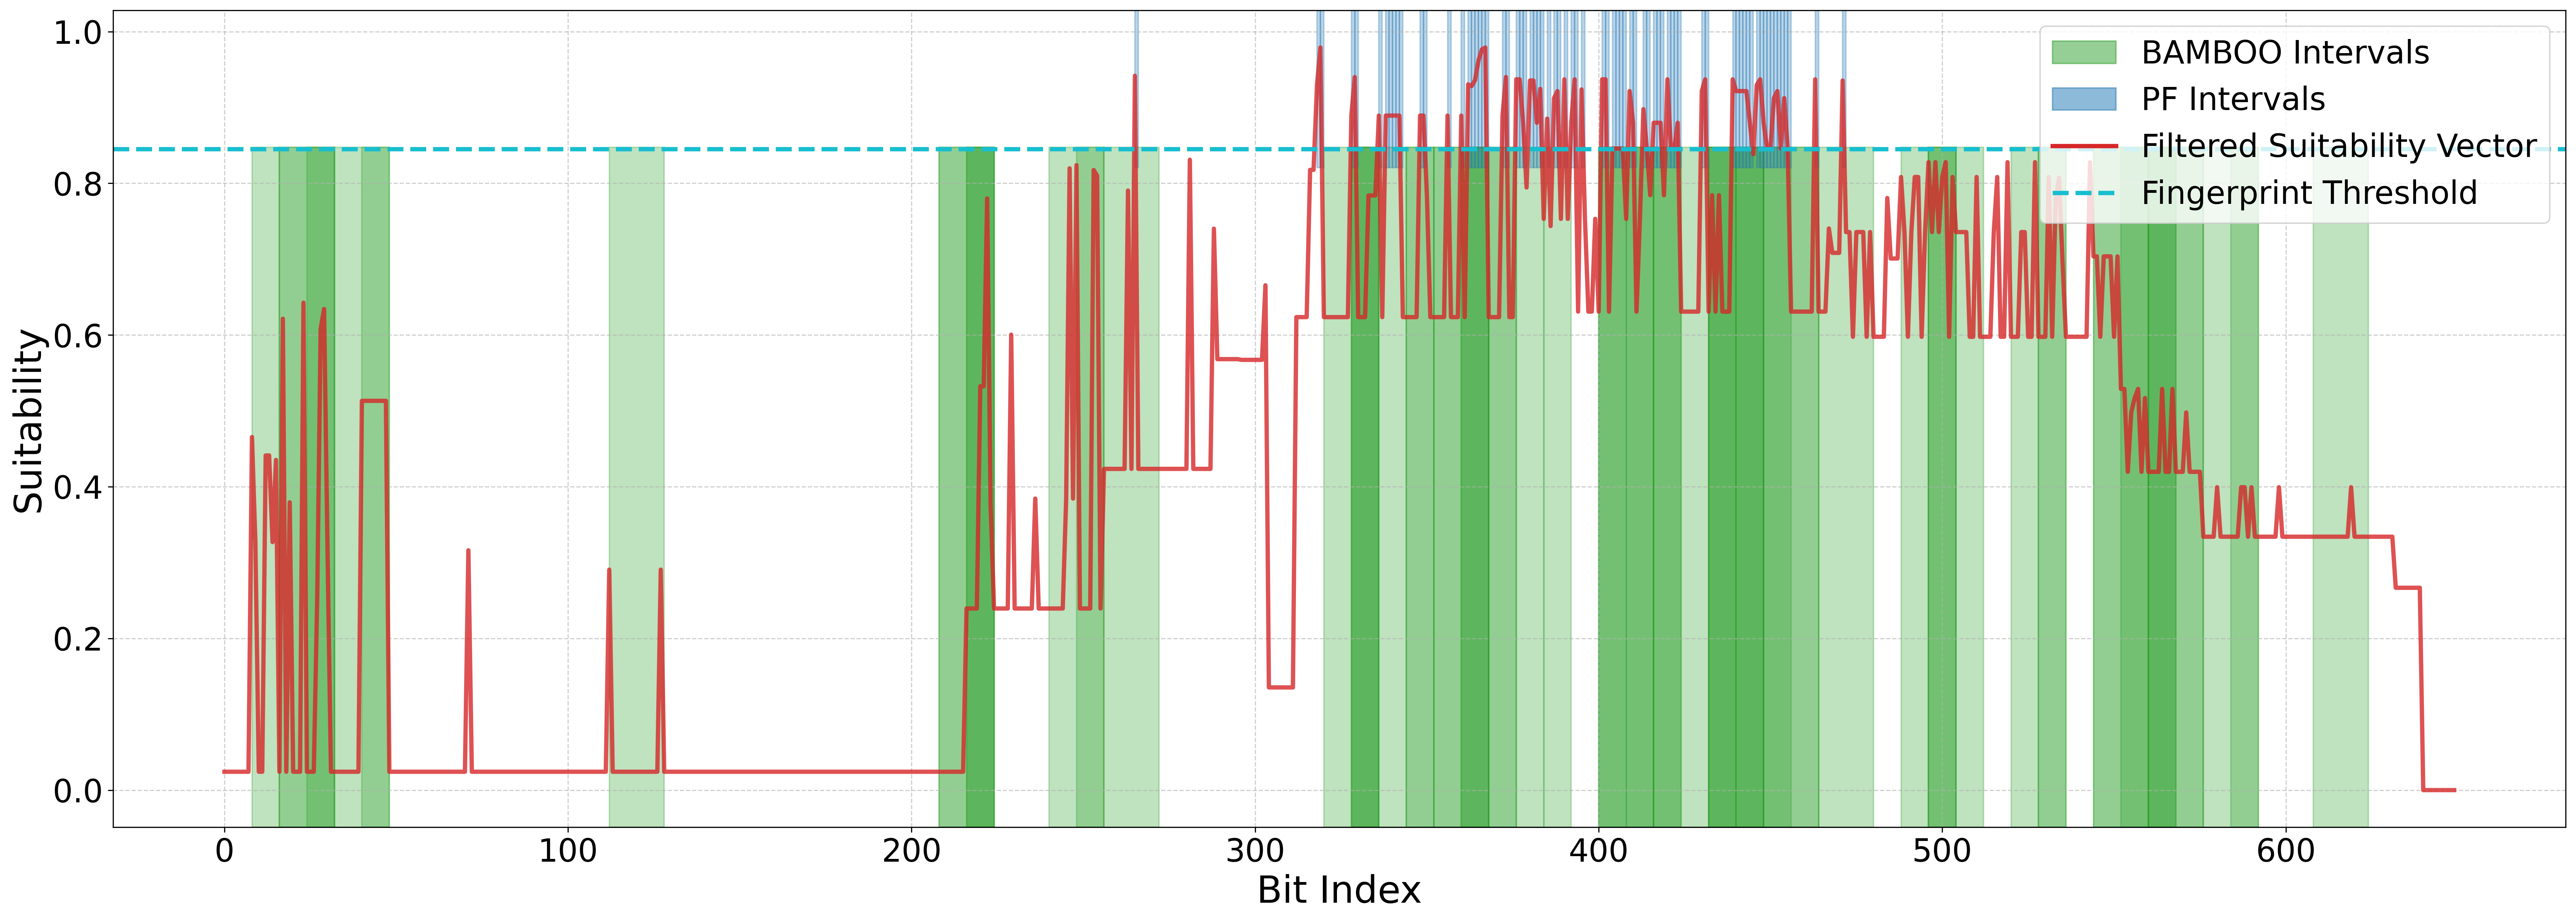

In [87]:
# Set figure size and high DPI for print quality
plt.figure(figsize=(25, 9), dpi=300)

# Plot the main line with large markers and thick lines for visibility
plt.plot(
    u_filtering[:650],
    marker="",
    markersize=12,  # Larger marker size
    linestyle="-",
    linewidth=3,  # Thicker line
    color=colors[3],  # Use the first color from sns tab10 palette
    label="Filtered Suitability Vector",
    alpha=0.8,
)

# Add the fingerprint threshold line with a thicker line
plt.axhline(
    y=fingerprint_threshold,
    color=colors[9],  # Use the second color from sns tab10 palette
    linestyle="--",
    linewidth=3,
    label="Fingerprint Threshold",
)

# Shade background for intervals P to P + L with more distinct colors and opacity
for l, p in data_fabio:
    plt.axvspan(
        p,
        p + l,
        color=colors[2],  # Use the third color from sns tab10 palette
        alpha=0.3,  # Less transparency for visibility
        ymax=fingerprint_threshold*0.985,
    )

# Shade background for each index in indexes
for index in indexes:
    plt.axvspan(index, index + 1, color=colors[0], alpha=0.3, ymin=y_threshold)

# Increase font sizes for title, labels, and grid
plt.xlabel("Bit Index", fontsize=26)
plt.ylabel("Suitability", fontsize=26)
plt.grid(True, linestyle="--", alpha=0.6)

# Increase font size for axis ticks
plt.tick_params(axis="both", which="major", labelsize=22)

# Define legend with even larger font sizes and clearer labels
bamboo_patch = Patch(color=colors[2], alpha=0.5, label="BAMBOO Intervals")
pf_patch = Patch(color=colors[0], alpha=0.5, label="PF Intervals")
filtered_line = Line2D(
    [],
    [],
    color=colors[3],
    marker="",
    linestyle="-",
    markersize=12,
    linewidth=3,
    label="Filtered Suitability Vector",
)
threshold_line = Line2D(
    [], [], color=colors[9], linestyle="--", linewidth=3, label="Fingerprint Threshold"
)

# Add legend with large font size and position it
plt.legend(
    handles=[bamboo_patch, pf_patch, filtered_line, threshold_line],
    fontsize=22,
    loc="upper right",
)

# Adjust layout for better fitting
plt.tight_layout()

#plt.savefig(
#    f"C:/Users/fabio/Documents/GitHub/CompactProbes/outputs/figures/filtered_suitability_vector_plot_{M}.pdf",
#    dpi=300,
#    bbox_inches="tight",
#)

# Show the plot
plt.show()


In [92]:
# Convert the indexes list to a DataFrame
indexes_df = pd.DataFrame(indexes, columns=["Index"])

# Save the DataFrame to a CSV file
indexes_df.to_csv(f"C:/Users/fabio/Documents/GitHub/CompactProbes/outputs/PF/indexes/indexes_{M}.csv", index=False)

In [89]:
# Initialize an array of zeros with the same length as u_filtering
probabilistic_filter = np.zeros(len(u_filtering), dtype=int)

# Set the elements at the specified indexes to 1
for index in indexes:
    probabilistic_filter[index] = 1

probabilistic_filter

array([0, 0, 0, ..., 0, 0, 0], shape=(1784,))

In [ ]:
# Convert the probabilistic_filter to a DataFrame
probabilistic_filter_df = pd.DataFrame(probabilistic_filter, columns=["Binary Value"])

# Save the DataFrame to a CSV file
#probabilistic_filter_df.to_csv(
#    f"C:/Users/fabio/Documents/GitHub/CompactProbes/outputs/PF/probabilistic_filter_{M}.csv", index=False
#)